# Introduction to TensorFlow for AI

*To make the computations faster in the google colaboratory environment, choose GPU as the runtime type.*

In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models
from keras.preprocessing import image
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

*These are my lecture notes taken from the course "Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning" by Laurence Moroney from Coursera.*

A neural network is a set of functions which can learn patterns. 

### Creating a first Neural Network using Keras

The following code produces a neural network with one neuron.

In [2]:
model = keras.Sequential([keras.layers.Dense(units = 1, input_shape=[1])]) 
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

The `tf.keras.Sequential(layers=None, name=None)` class is used. It groups a linear stack of layers into a `tf.keras.Model` and provides training and inference features on this model. In its argument, a regular connected (`dense`) neural network layer `tf.keras.layers.Dense` is given.

*   `units` : A positive integer, dimensionality of the output space  
*   `input_shape`: Can be defined in the first layer only, here it is only 1 value

Successive layers are defined in sequence, therefore the name. The model is compiled in the second row, using the stochastic gradient descent `sgd` optimizer and the mean squared error as the loss function. Stochastic gradient descent is a stochastic approximation of gradient descent, where the gradient is not the actual gradient as calculated from the whole dataset, but only an estimate, taken from a randomly selected subset. The gradient is approximated a a single example

$$w \rightarrow w - \alpha  \sum\limits_{i=1}^n \nabla Q_i(w)$$

with the step size or learning rate $\alpha$, the value $Q_i$ of the loss function at the $i$-th example. This step is repeated for several examples of the training set until the algorithm converges.

A training set is implemented in the following. The formula with which the y values are calculated is - unknown to the model yet - $y = x^2 + 2$. 



In [3]:
x = np.array([i for i in range (10)], dtype = float)
y = np.array([3*i+2 for i in x], dtype = float) 
print(x)
print(y)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 2.  5.  8. 11. 14. 17. 20. 23. 26. 29.]


After the model above with one layer and one neuron is trained, it can predict $y$ for other $x$. To `epoch`: An epoch is an arbitrary cutoff, defined as "one pass over the entire dataset", used to separate training into distinct phases, useful for logging and periodic evaluation. 

In [4]:
model.fit(x,y,epochs=500, verbose = 0)

In [5]:
print(model.predict([10,20]))

[[32.054066]
 [62.19903 ]]


Both times, the `predict` method predicts the most probable value, which is approximately correct, but not perfectly. Precision could be improved by adding more training data or using a bigger neural network, but the NN will obviously never know the formula behind it and give exact values as output.

**Exercise: ** *In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula. So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc. How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.*


In [6]:
exercise_model = keras.Sequential([keras.layers.Dense(units = 1, input_shape=[1])])
exercise_model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
xs = np.array([i for i in range(0,6)], dtype = float)
ys = np.array([5+i*5 for i in xs], dtype = float)
exercise_model.fit(xs, ys, epochs = 500, verbose = 0)
print(exercise_model.predict([7.0]))

[[40.16789]]


My model predicts a 7 bedroom house to cost $40.17 \cdot 10^4$ units.

## Introduction to Computer Vision 

### Loading Data

As an example, take one of the datasets provided by Keras as toy datasets. These include a dataset with images for digit classification, an IMDB movie review sentiment classification test and a fashion dataset providing pictures of different clothing pieces. More on the [keras.io](https://keras.io/api/datasets/) page.

More information on the fasion MNIST dataset is found on [zalandoresearch](https://github.com/zalandoresearch/fashion-mnist)'s GitHub. Labels are usually numbers, because it reduces bias in comparison to giving it an English, Chinese, etc. name. 

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### General recommended practices for AI 

Valuable tips ahout the design process are given at [ai.google](https://ai.google/responsibilities/responsible-ai-practices/). This text provides information about how to make your product engaging and satisfying for as many users as possible, how to make the project useful and how to employ the work without complications. For example, it is useful to test the progress with diverse users throughout the whole process. The metrics to assess training should be chosen wisely (e.g. cancer detection should rather show false positives than false negatives) and performance should be assessed by user surveys. The raw data should be investigated, cleaned and understood, and one should know the limitations of both the dataset and model. 

### Coding a Computer Vision Neural Network

In the next coding example, the fashion dataset will be used. It consists of 60.000 28 x 28 pixels sized images of clothing in a grey-scale, therefore any pixel can have the value from 0 to 255. The model now has 3 layers, which are inserted into the `Sequential` class of Keras one after another. The input shape is the dimension of the input images from the dataset. `Flatten` describes a layer which [flattens](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the input data, so that the input is rearranged into a linear array of $28\cdot 28$ components (because it is not possible to have an input layer of 28 times 28 neurons). In the first hidden connected layer activated with a ReLU function, there are 128 units, and in the second, there are 10, which are activated by a softmax function. The output layer gives the probabilities for each of the 10 classes of clothing that are available as categories.

In [8]:
model_fashion = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                                 keras.layers.Dense(128, activation = tf.nn.relu),
                                 keras.layers.Dense(10, activation = tf.nn.softmax)])

# Normalize the data, so that a pixel's value is between 0 and 1 in stead of between 0 and 255. 
train_images = train_images / 255.0
test_images = test_images / 255.0

With the normalized test images and the neural network structure defined, the model can be compiled. The loss function is given by the the cross entropy loss functions for two or more labels according to the formula

$$\sum\limits_{c = 1}^{C} t_i \log (s_i) $$

with the truth $t_i$ and the score $s_i$ for each class. This is also called softmax loss. The output is a probability of every class for each example. 

In this example, an extension to the stochastic gradient descent, the Adam optimization algorithm, is used as the optimizer. 

In [9]:
model_fashion.compile( optimizer = tf.optimizers.Adam(),
                            loss = 'sparse_categorical_crossentropy',
                            metrics=['accuracy'])

model_fashion.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6431 - accuracy: 0.7795
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3830 - accuracy: 0.8625
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3414 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3126 - accuracy: 0.8871
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2979 - accuracy: 0.8913


The evaluation of the test images shows that the accuracy is about 0.8680, which is rather good for the short training with only 5 epochs, and the loss function is at 0.3663.

In [10]:
model_fashion.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3688 - accuracy: 0.8676


[0.3687639534473419, 0.8676000237464905]

Now the model is ready to be used on a previously un-seen test set, for which one has the truth labels to control the results. 

In [11]:
classifications = model_fashion.predict(test_images)

Printing this reveals that for the third test image, the highest probability of all 10 classes is 0.99995 for class 1 (trouser), which is the correct prediction, as can be seen from the test label and image.

[7.48549201e-06 9.99926448e-01 4.30577742e-08 6.45721011e-05
 1.43074180e-06 4.45535264e-13 1.14050405e-08 9.14861334e-16
 6.94925850e-09 3.19320769e-13]
1


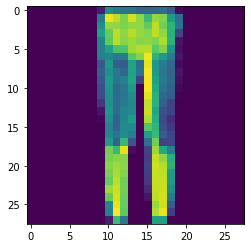

In [12]:
print(classifications[3])
print(test_labels[3])
plt.imshow(test_images[3])

To improve the model, one could on one hand use a higher number of neurons in the hidden layer (the downside of this is more computation time). In this case, the data is so simple that it wouldn't give a big performance improvement if one adds more layers in the NN, but this is certainly an option for bigger images with different color channels. Also, if you increase the number of epochs, you might get a better loss, but this improvement will flatten out and approach a certain value - this is the point where it does not make sense to keep increasing the number of epochs.

### Using Callbacks to control training

Callbacks can be used to interrupt training after a certain number of epochs, if the results are satisfying before the hard-coded number of epochs. They are inserted into the `fit` function with the parameter `callbacks = [callback]` as an example with a self-created class of callbacks `callback = myCallback()`

For this purpose, a function `on_epoch_end` can be filled with the desired code which might look like this (this function discontinues calculation if 0.99 accuracy score is reached. It is directly taken from the notebook of week 2 in the first Coursera Course):

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True 

callbacks = myCallback()

### Another example: Digit Recognition

In this example, I will use the MNIST digits classification dataset. It consists of 60.000 28x28 greyscale images showing one of the 10 digits from 0 to 9. The desired accuracy is 99%, so the model will stop training after this value is reached, and the maximum number of epochs is set to 10. 

In [14]:
digits_MNIST = tf.keras.datasets.mnist
(train_images_digit, train_labels_digit), (test_images_digit, test_labels_digit)= digits_MNIST.load_data(path="mnist.npz")

train_images_digit = train_images_digit / 255
test_images_digit = test_images_digit / 255

digit_model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                                 keras.layers.Dense(512, activation = tf.nn.relu),
                                 keras.layers.Dense(10, activation = tf.nn.softmax)])

digit_model.compile(optimizer='adam', 
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

11493376/11490434 [==============================] - 0s 0us/step


Now the model is fitted. With 128 neurons in the first layer, 7 epochs will be needed to reach 0.9921 accuracy, with a loss of 0.0271 - but only 5 epochs will be needed to surpass 99%, with a loss of 0.0258.

In [15]:
digit_model.fit(train_images_digit, train_labels_digit, epochs=10, callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3416 - accuracy: 0.8990
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0830 - accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0487 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0363 - accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0247 - accuracy: 0.9919
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0172 - accuracy: 0.9945
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0148 - accuracy: 0.9949
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0123 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0087 - accuracy: 0.9970
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.011

## Enhancing Vision with Convolutional Neural Networks

CNNs are used to condense images down to important features, which determine the classification, so that the pixels which do not give any information do not have to be considered like they would be in a deep neural network (DNN), where every single pixel is considered. CNNs work with filters, which are applied to the current pixel under investigation, but also to the neighboring pixel values. Therefore filters are used, which are $n \times n$ areas which are multiplied componentwise onto the image value to enhance certain features. For a $3\times 3$ area in an input image, a $3\times 3$ filter is applied by

$$ \begin{bmatrix}
p_{11} & p_{12}& p_{13}\\
p_{21} & p_{22}& p_{23}\\
p_{31} & p_{32}& p_{33} 
\end{bmatrix} \ast \begin{bmatrix}
f_{11} & f_{12}& f_{13}\\
f_{21} & f_{22}& f_{23}\\
f_{31} & f_{32}& f_{33} 
\end{bmatrix} \rightarrow \begin{bmatrix}
f_{11}\cdot p_{11} & f_{12}\cdot p_{12} & f_{13}\cdot p_{13}\\
f_{21}\cdot p_{21} & f_{22}\cdot p_{22} & f_{23}\cdot p_{23} \\
f_{31}\cdot p_{31} & f_{32}\cdot p_{32} & f_{33} \cdot p_{33} 
\end{bmatrix}$$

and in TensorFlow, the convolutions are implemented using `Conv2D` layers.

### Examples of filters

Enhancement of vertical lines: $ \begin{bmatrix}-1&0&1\\-2&0&2\\-1&0&1\end{bmatrix} $

Enhancement of horizontal lines: $ \begin{bmatrix}-1&-2&-1\\0&0&0\\-1&-2&-1\end{bmatrix} $

Soft blur filter (the bigger, the better the blur): $ \begin{bmatrix}0.0&0.2&0.0\\0.2&0.2&0.2\\0.0&0.2&0.0\end{bmatrix}$

More examples can be found [here](https://lodev.org/cgtutor/filtering.html).

### Pooling Layers

A pooling layer condenses an $n \times n$ area of the input into a smaller one, making the output dimension smaller. For example, one could look for the *biggest* value in a certain area and only keep this one in the output (this will preserve the most prominent feature) or one could average over the area. In TensorFlow, the max pooling layers are implemented as `MaxPooling2D`.

### Structure of a CNN 

The CNN will use a mixture of convolution and pooling layers in front of the flattened deep neural network structure used in the DNN examples. For example, the convolutional neural network used for the fashion classification

$$ \underbrace{\text{Input}}_{(28 \times 28 \times 1)}
\rightarrow \text{Conv2D}
\underbrace{{\rightarrow}}_{(26 \times 26 \times 64)} \text{MaxPool}
\underbrace{{\rightarrow}}_{(13 \times 13 \times 64)} \text{Conv2D}
\underbrace{{\rightarrow}}_{(11 \times 11 \times 64)} \text{MaxPool}
\underbrace{{\rightarrow}}_{(5 \times 5 \times 64)} \text{Flat}
\underbrace{{\rightarrow}}_{(5\cdot 5\cdot 64 = 1600)} \text{Dense}
\underbrace{{\rightarrow}}_{(128)} \text{Dense}
\rightarrow \underbrace{\text{Output}}_{(10)} $$

is implemented in the following. The first layer is a `Conv2D` layer, which applies a $3\times 3$ filter to each of the possible pixels of the input. The input shape is now 3-dimensional, with the x- and y coordinates of the pixel and the color dimension (in case of grey scale images, this is only 1, RGB has 3, etc.). This layer applies 64 suitable different filters to the image, so that the output dimension of the first layer is $(26 \times 26 \times 64)$. TensorFlow will figure out which filters work. The two pixels left are explained by the need for every pixel to have all neighbors the filter uses. The next layer is a `MaxPooling2D` layer, which reduces an area of $2\times 2$ pixels to one pixel featuring the maximum value. The output here is therefore $(13\times 13\times 64)$. The next pooling layer rounds down to $5$ on the x and y dimensions, and then the output is flattened and goes through two dense hidden layers with 128 and 10 units. This allows for the network to first identify the important feature of the image before going into the analysis with the 2 dense layers.

Note that the number of convolutions are generally arbitrary, but it is good to start with something in the order of $32$.



In [16]:
# Use training / test sets which are already loaded and normalized
# train_images.shape is currently (60000, 28, 28) 
train_images=train_images.reshape((60000, 28, 28,1))
# test_images.shape is currently (10000, 28, 28) 
test_images=test_images.reshape((10000, 28, 28,1))

CNN_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# compile the new model 
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the new model
CNN_model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 35s 3ms/step - loss: 0.6025 - accuracy: 0.7833
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3021 - accuracy: 0.8909
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2451 - accuracy: 0.9110
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2133 - accuracy: 0.9203
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1874 - accuracy: 0.9298


In [17]:
# Test it on the test set to see how it has improved recognition
CNN_test_loss = CNN_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2618 - accuracy: 0.9051


The result is `loss: 0.2579 - accuracy: 0.9072`

The training will take longer with this more complicated network architecture, but the accuracy is improved on the test and training set with the previous enhancement of the input. It is possible to use even more epochs, but then one has to be cautious about overfitting, so that the performance on the test set might actually go down at some point. 

You can call `model.summary()` to get a tabular information about each layer of the neural network, its dimensions and the used parameters.

With the help of the `matplotlib` library, it is possible to get a visual representation of the features a convolution sees. One can see how similar features among the images in one class emerge.

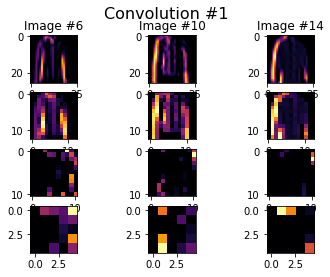

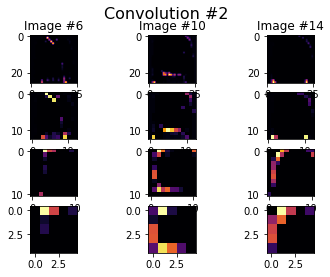

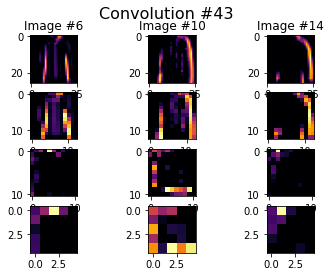

In [18]:
def plot_convolutions(img_nr_ar, conv_nr_ar, test_images, CNN_model):
  layer_outputs = [layer.output for layer in CNN_model.layers]
  activation_model = tf.keras.models.Model(inputs = CNN_model.input, outputs = layer_outputs) 
  dmax=4
  for c in range(conv_nr_ar.shape[0]): 
    fig, ax = plt.subplots(dmax, img_nr_ar.shape[0])  
    fig.suptitle('Convolution #{}'.format(conv_nr_ar[c]), fontsize=16) 
    for i in range(0,img_nr_ar.shape[0]):  
      for d in range(dmax):
        f = activation_model.predict(test_images[img_nr_ar[i]].reshape(1, 28, 28, 1))[d]
        ax[d,i].imshow(f[0, : , :, conv_nr_ar[c]], cmap='inferno')
        if (d == 0):
          ax[d,i].set_title('Image #{}'.format(img_nr_ar[i])) 
        ax[d,i].grid(False)  

# the index of the images in the test set
img_nr = np.array([6,10,14]) 
# the number of the convolution to visualize
conv_nr = np.array([1,2,43])

plot_convolutions(img_nr, conv_nr, test_images, CNN_model)

### Exercise Questions

For a CNN with the structure 

$$ \text{Conv2D} \rightarrow \text{MaxPool} \rightarrow \text{...} \rightarrow \text{Flatten} \rightarrow  \text{Dense} \rightarrow \text{Dense} $$

using the fashion MNIST dataset, the following data is collected by varying the number of conv2D and pooling layer pairs and the number of filters. The accuracy goal to end the training is $>99.5\%.$

| # Conv2D | # Filters | Epoch | Accuracy | Loss | Time per step |
| -- |-- |-- |-- |-- |-- | 
|1|16|5|99.61%|0.0140|24s 13ms/step|
|1|32|5|99.58%|0.0129|35s 19ms|
|1|64|5|99.63%|0.0116|55s 29ms|
|2|16, 16|8|99.58%|0.0122|28s 15ms|
|2|32, 32|6|99.62%|0.0121|42s  22ms|
|2|64, 64|5|99.57%|0.0134|82s 44 ms|

In this table, the trend is that the number of filters is proportional to computation time and antiproportional to the epochs required for reaching the accuracy goal. Using 2 instead of one pair of convolution and pooling layers increases computation time. 

### Building filters and pooling layers

Here are some hand-built filters and pooling layers.  

In [19]:
def verticalLines(input):
  X, Y = input.shape
  i_transformed = np.zeros((X,Y))
  filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) 
  weight = 1 
  for x in range(1, X - 1): 
    for y in range(1, Y - 1):
      img_slice = input[x-1:x+2, y-1:y+2] 
      convolution = np.multiply(img_slice, weight * filter)
      convsum = sum(convolution.flatten())
      if convsum > 255: convsum = 255
      if convsum < 0: convsum = 0
      i_transformed[x,y] = convsum
  return i_transformed[1:X-1, 1:Y-1]

def horizontalLines(input):
  X, Y = input.shape 
  i_transformed = np.zeros((X,Y))
  filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = float) 
  weight = 1
  for x in range(1, X - 1): 
    for y in range(1, Y - 1):
      img_slice = input[x-1:x+2, y-1:y+2]  
      convolution = np.multiply(img_slice, weight * filter)  
      convsum = sum(convolution.flatten())
      if convsum > 255: convsum = 255
      if convsum < 0: convsum = 0
      i_transformed[x,y] = convsum
  return i_transformed[1:X-1, 1:Y-1]

def motionBlur(input, size):
  filter_size = 2 * size + 1
  X, Y = input.shape
  i_transformed = np.zeros((X,Y))
  filter = np.zeros((filter_size, filter_size))
  weight = 1 / filter_size
  for d in range(filter_size): 
    filter[d][d] = 1
  for x in range(size, X - size): 
    for y in range(size, Y - size):
      img_slice = input[x-size:x+size+1, y-size:y+size+1] 
      convolution = np.multiply(img_slice, weight * filter)
      convsum = sum(convolution.flatten())
      if convsum > 255: convsum = 255
      if convsum < 0: convsum = 0
      i_transformed[x,y] = convsum
  return i_transformed[size:X-size, size:Y-size]

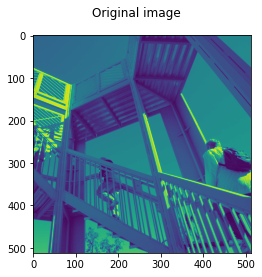

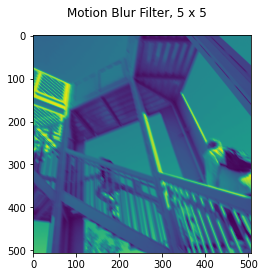

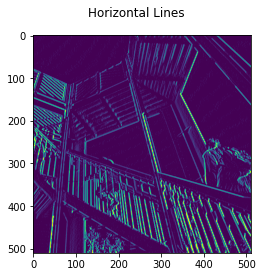

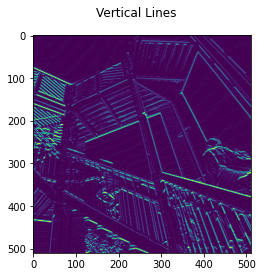

In [20]:
img_ascent = misc.ascent()
plt.imshow(img_ascent)  
plt.suptitle('Original image') 
plt.show()
plt.imshow(motionBlur(img_ascent, 3))  
plt.suptitle('Motion Blur Filter, 5 x 5') 
plt.show()
plt.imshow(horizontalLines(img_ascent)) 
plt.suptitle('Horizontal Lines')   
plt.show()
plt.imshow(verticalLines(img_ascent)) 
plt.suptitle('Vertical Lines')  
plt.show()

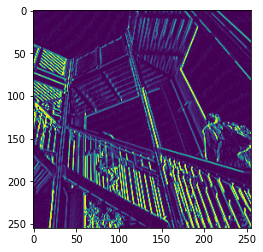

In [21]:
# Pooling Layers
test = np.arange(100).reshape((10,10))
def MaxPooling(input,size):
  X, Y = input.shape 
  i_transformed = np.zeros((X// size,Y // size)) 
  for x in range(0,X//size):  
    for y in range(0,Y//size): 
      img_slice = input[2*x:2*x+size, 2*y:2*y+size]  
      i_transformed[x,y] = np.amax(img_slice)
  return i_transformed

plt.imshow(MaxPooling(horizontalLines(img_ascent), 2))   
plt.show()

### Conclusion

- A convolution is a technique to isolate features in images. They improve image recognition by isolating features in images. 
- Applying convolutions on top of deep neural networks will make training only faster if you design it in an adequate way!
- Example 1: Passing a 3x3 filter over a 28x28 image will give a 26x26 output
- Pooling is a technique to reduce the information in an image while maintaining features
- Example 2: max pooling a 26x26 image with a 2x2 filter will give a 13x13 output

### Exercise: Adding a CNN to the Fashion MNIST dataset

Now I will try to make the Fashion MNIST a CNN and reach 99.8% accuracy using only a single pair of convolutional layer plus pooling layer. I take the training and test sets which are loaded above already, they are also already normalized, reshaped to fit into the CNN's input. I have a feeling that, while this might give an opportunity to get a feeling for numbers of filters, units etc., 99.8% is vastly overfitting to the training data anyways and not very helpful.

In [22]:
def exercise_CNN_fashion():  
  callbacks = myCallback()
  fashion_mnist = tf.keras.datasets.mnist
  (train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data() 
  train_images = train_images.reshape(60000,28,28,1) /255
  test_images = test_images.reshape(10000,28,28,1) / 255

  # structure the model
  CNN_model_improved = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    #tf.keras.layers.MaxPooling2D((2, 2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax')
  ])

  # compile the new model 
  CNN_model_improved.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # Fit the new model
  CNN_model_improved.fit(train_images, train_labels, epochs=20, callbacks = [callbacks])

  # test if overfitted...
  test_images = test_images.reshape(10000,28,28,1) / 255
  CNN_model_improved.evaluate(test_images, test_labels)

exercise_CNN_fashion()

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2463 - accuracy: 0.9227
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0380 - accuracy: 0.9888
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0173 - accuracy: 0.9942
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0104 - accuracy: 0.9965
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0069 - accuracy: 0.9980
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0054 - accuracy: 0.9982
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0049 - accuracy: 0.9983
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0029 - accuracy: 0.9991

Reached 99.8% accuracy so cancelling training!
313/313 [==============================] - 1s 2ms/step - loss: 2.3084 - accuracy: 0.1135


## Real-World Images

In the previous examples, the datasets were uniform, small images in a greyscale. But what if the images are bigger in size and have different aspect ratios. TensorFlow has the `ImageDataGenerator` ImageGenerator ([API](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)).

- Create an image generator using `ImageDataGenerator(rescale = 1./ 255)`
- Use the method `flow_from_directory' should be pointed at directory that contains subdirectories to 

### Import files from the file system

To import an image dataset with the OS library (operating system library) and the zipfile library for the zipped content, you can use a function like this one. The `horse-or-human` dataset is available at Lawrence Moroney's [blog](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip) and comes zipped.

`wget` is a program which can download data from HTTP, HTTPS or FTP servers. `--no-check-certificate` is used to be able to use non-trusted SSL certificates and `-O` has the path where the data is written into [(wget doc)](http://www.gnu.org/software/wget/manual/html_node/Download-Options.html#Download-Options). 


In [23]:
import os
import zipfile

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip 

path = "/tmp/horse-or-human"
zip_ref = zipfile.ZipFile('{}.zip'.format(path), 'r')
zip_ref.extractall(path)
zip_ref.close() 

--2021-04-15 11:53:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.144, 172.217.9.208, 172.217.7.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   217MB/s    in 0.7s    

2021-04-15 11:53:13 (217 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



The `/tmp/horse-or-human` directory will contain subdirectories with the names `horses` and `humans` subdirectories with according images of either horses or humans in them. The image generator will read the name of the subdirectory and label the image.

The datasets are loaded using the `join` method of `os.path` ([python 3 doc](https://docs.python.org/3/library/os.path.html)), which intelligently joins one or more path components. It returns a string containing the path of the directory. 

In [24]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

The names of the images can be obtained by using the `listdir(train_horse_dir)` method of `os`. Examples of the images are (code is taken from the course notebook if the first course of the TensorFlow specialization by Lawrence Moroney and slightly changed):

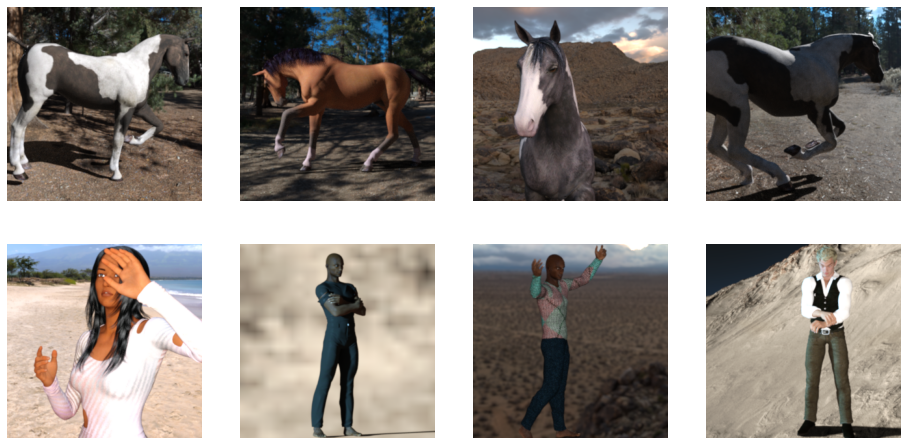

In [25]:
%matplotlib inline 

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(4 * 4, 2 * 4)

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

pic_index += 4
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-4:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(2, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


### Create a suitable CNN with real world images

The CNN network can have more than one pair of a convolutional layer followed by a pooling layer to work better on more complex images. The output layer might have a `sigmoid` activation function in order to do a binary classification with only one neuron instead of two! For this example, a CNN with 5 pairs of convolution and pooling layer is chosen, which feeds into a DNN with the output of dimension 1 being either `human` or `horse`. Note that the input shape is not the size of each image from the training set, and that there are 3 different color channels. 

In [26]:
horses_or_humans_model = keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

The model is compiled using the binary crossentropy loss function, because this is a binary classification problem, and the optimizer is `RMSprop`, which can in contrast to `sgd` adapt the learning rate during training. Other options for optimziers would be `adam` or `adagrad`, which would work equally fine here.

In [27]:
horses_or_humans_model.compile(loss='binary_crossentropy',
                               optimizer=keras.optimizers.RMSprop(lr=0.001),
                               metrics=['accuracy'])

Now that the model is ready, the images have to be inserted into it as suitable inputs. Therefore, the images are read, converted into tensors of the type `float32` and used to train the model with their respective labels. The input layer of the model takes input of dimension `300,300,3`, therefore an ImageGenerator ([keras API](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)) is used instead of the images directly as I did previously. The method `flow_from_directory` takes the path to a dirrectory and generates batches of augmented data. Alternatively, one can get get data from dataframes with`flow_from_dataframe` or feed in data directly with `flow`.

The `flow_from_directory` method returns a `keras.preprocessing.image.DirectoryIterator` object, which is an iterator able to read images from a directory on disk. 

In [28]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # Source 
        target_size=(300, 300),  # image size after preprocessing
        batch_size=128,          
        class_mode='binary')      # binary classifier in this model

type(train_generator)

Found 1027 images belonging to 2 classes.


tensorflow.python.keras.preprocessing.image.DirectoryIterator

The model can be fitted with the iterator through the training dataset, which is generated with the ImageGenerator. 

In [29]:
history = horses_or_humans_model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 9s 635ms/step - loss: 1.1365 - accuracy: 0.4972
Epoch 2/15
8/8 [==============================] - 6s 715ms/step - loss: 0.8030 - accuracy: 0.5542
Epoch 3/15
8/8 [==============================] - 6s 689ms/step - loss: 0.6609 - accuracy: 0.6440
Epoch 4/15
8/8 [==============================] - 6s 703ms/step - loss: 0.3721 - accuracy: 0.8606
Epoch 5/15
8/8 [==============================] - 6s 685ms/step - loss: 0.1970 - accuracy: 0.9152
Epoch 6/15
8/8 [==============================] - 6s 710ms/step - loss: 0.2702 - accuracy: 0.8903
Epoch 7/15
8/8 [==============================] - 6s 693ms/step - loss: 0.2476 - accuracy: 0.9114
Epoch 8/15
8/8 [==============================] - 6s 720ms/step - loss: 0.1662 - accuracy: 0.9354
Epoch 9/15
8/8 [==============================] - 6s 710ms/step - loss: 0.3514 - accuracy: 0.9242
Epoch 10/15
8/8 [==============================] - 7s 799ms/step - loss: 0.3421 - accuracy: 0.8753
Epoch 11/15
8/8 [==

To make predictions, one can upload their own photo using the following code. The image is loaded with `load_img` of the module `tf.keras.preprocessing.image`, which loads an image into PIL format. PIL format is the Python Imaging Library. It is resized to 300 x 300 pixels. Then, it is converted from PIL format to a numpy array using `img_to_array`. 

In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload() # opens dialogue to load a picture from the file system

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) # expand_dims expands the dimensions of x with a new axis

  images = np.vstack([x]) # stacks x row-wise 
  classes = model.predict(images, batch_size=10) # predicts the classes of the input files
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

*Bonus: Visualization of the layers of a random picture from the horses or humans dataset*

At first, the previously used CNN is copied except for the first layer into `successive_outupts`, and then this is used to create a new model `visualization_model`, which uses the inputs of the previous model and puts out the `successive_outputs` layers. The prediction of a randomly chosen image from the training set `x`, which is reshaped and normalized, is given by `successive_feature_maps`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


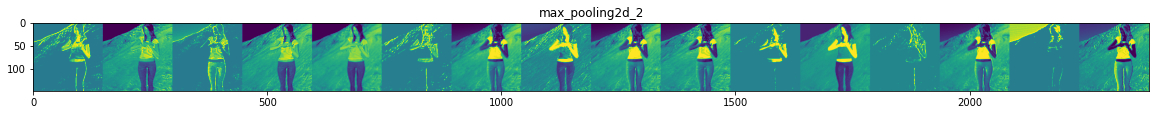

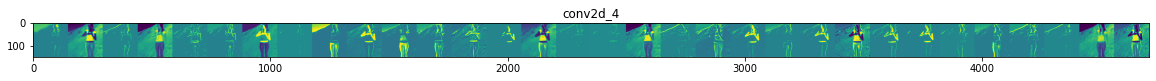

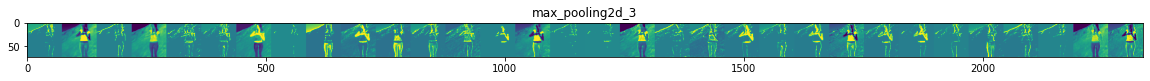

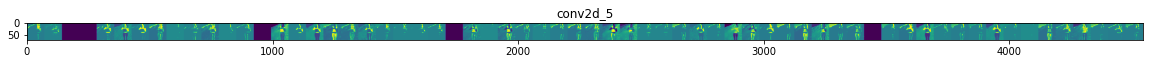

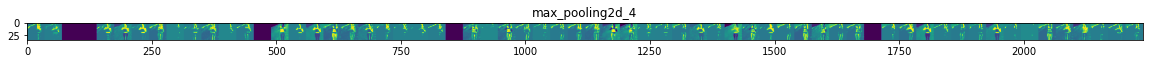

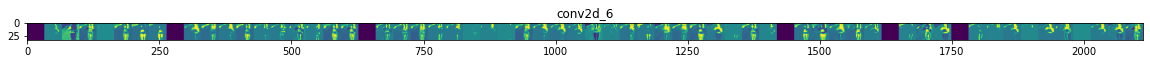

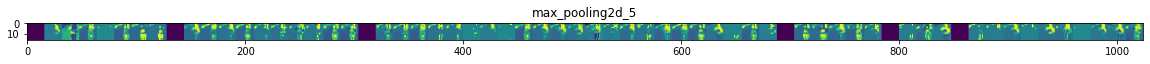

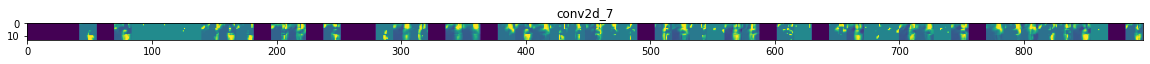

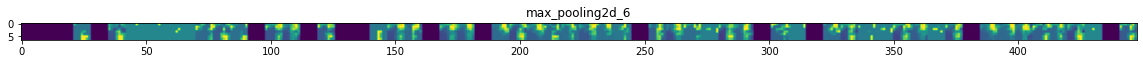

In [31]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in horses_or_humans_model.layers[1:]]

visualization_model = tf.keras.models.Model(
    inputs = horses_or_humans_model.input, 
    outputs = successive_outputs)

# Load a random image from the training set
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300)) 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  # x has shape (1, 150, 150, 3)
x /= 255
successive_feature_maps = visualization_model.predict(x)

# Get layer names for visualization
layer_names = [layer.name for layer in horses_or_humans_model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Adding automatic validation to test accuracy

You can use a validation dataset and build it into the training loop by specifying a set of validation images, and then TensorFlow evaluates its effectiveness.

The accuracy of the validation set is expected to be worse in terms of accuracy than the training set, because the algorithm has not seen the picture in the validation set before. 

At first, the validation set is downloaded. It contains images that the algorithm has not seen during the training. 

In [32]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
 
path = "/tmp/validation-horse-or-human"
zip_ref = zipfile.ZipFile('{}.zip'.format(path), 'r')
zip_ref.extractall(path)
zip_ref.close() 

# Directory with our training horse and human pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

--2021-04-15 12:30:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.06s   

2021-04-15 12:30:39 (171 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



The validation set images are, in contrast to the training set, not labeled through the names of the subdirectories they are in. Similar to the training images, the validation dataset is processed using an ImageGenerator. The steps are analogously to the ones used for the training set, only that the batch size here is chosen smaller. 

In [33]:
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/', 
        target_size=(300, 300),  
        batch_size=32,
        class_mode='binary')

Found 256 images belonging to 2 classes.


Now training with the validation set can begin. Note that here, the validation ImageGenerator is used as `validation_data`, and its accuracy is always lower than the one of the training set. With this technique, one can see how the model performs on unseen image during training already. 

In [34]:
history = horses_or_humans_model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 8s 994ms/step - loss: 0.1514 - accuracy: 0.9388 - val_loss: 0.9333 - val_accuracy: 0.8672
Epoch 2/15
8/8 [==============================] - 7s 873ms/step - loss: 0.0322 - accuracy: 0.9900 - val_loss: 1.3997 - val_accuracy: 0.8555
Epoch 3/15
8/8 [==============================] - 7s 917ms/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 1.5506 - val_accuracy: 0.8711
Epoch 4/15
8/8 [==============================] - 7s 977ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.8503 - val_accuracy: 0.8672
Epoch 5/15
8/8 [==============================] - 7s 874ms/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.3420 - val_accuracy: 0.9336
Epoch 6/15
8/8 [==============================] - 7s 875ms/step - loss: 0.2233 - accuracy: 0.9544 - val_loss: 1.6481 - val_accuracy: 0.7617
Epoch 7/15
8/8 [==============================] - 7s 864ms/step - loss: 0.0208 - accuracy: 0.9956 - val_loss: 1.6249 - val_accuracy: 0.8203
Epoch 8/15
8/8 [====

### Impact of compressing images

The original input data were 300x300 pixels large and the CNN reduced the pixels using various techniques down to the most important features. To reduce the computational costs, one could also propose that the input image should now be half as big in dimensions. As a result, one is able to leave out the fourth and fifth layers in the convolutional model. 

When doing this and training the model on the training data, the process becomes faster while the accuracy results for training and validation sets are good. Still, it is advisable to see at which images the algorithm is not as accurate and to find out the reasons for it. Therefore, a big validation set is important.

### Summary
- The Image Generator labels images based on the directory the image is contained in
- The Image Generator can normalize the images using the `rescale` method.
- The training size of the images are specified by the `target_size` parameter in the training generator
- An input shape of 300x300x3 means that there are 300x300 pixels and 3 bytes for color
- An accuracy of nearly 1.000 on the training set is very likely overfitting to the training data when the validation accuracy is much lower. 
- CNNs are better at classifying images like horses or humans because there is a wide variety of humans and horses and the features might be in different parts of the frame.
- When compressing the image to a lower size, one can remove a couple of layers to handle smaller images, but this changes the results of the training.

### Exercise: Happy Or Sad Dataset

The happy or sad dataset contains 80 images, from which 40 are happy and 40 are sad. The data shows 3D emojis. The goal is to train a CNN on this set which reaches 100% test accuracy and cancels upon hitting training accuracy of >0.999. I will use 3 convolutional layers and 3 maxpooling layers. The original images have a size of 150x150 pixels. 

In [35]:
def exercise_happy_or_sad():
  import tensorflow as tf
  import os
  import zipfile

  # the callback
  desired_accuracy = 0.999

  class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>desired_accuracy):
        print("\nReached 99.9% accuracy so cancelling training!")
        self.model.stop_training = True 
  callbacks = myCallback()

  # load data
  !wget --no-check-certificate \
      "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
      -O "/tmp/happy-or-sad.zip"
  #unzip data
  zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
  zip_ref.extractall("/tmp/h-or-s")
  zip_ref.close()
  # load labeled training sets
  train_happy_dir = os.path.join('/tmp/h-or-s/happy')
  train_sad_dir = os.path.join('/tmp/h-or-s/sad')
  # structure the model
  happy_sad_model = keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2), 
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),  
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  # compile the model using a binary classifier
  happy_sad_model.compile(loss='binary_crossentropy',
                          optimizer=keras.optimizers.RMSprop(lr=0.001),
                          metrics=['accuracy'])

  #happy_sad_model.summary()
 
  # Use image augmentation on the dataset 
  train_datagen_HS = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
  train_gen_HS = train_datagen_HS.flow_from_directory(
          '/tmp/h-or-s',  
          target_size=(150, 150),  
          batch_size=10,          
          class_mode='binary')    
  # fit the model with the image generator
  history_HS = happy_sad_model.fit(
        train_gen_HS,
        steps_per_epoch=8,  
        epochs=15,
        verbose=1, 
        callbacks=[callbacks])
  
exercise_happy_or_sad()

--2021-04-15 12:32:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 142.250.73.208, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2021-04-15 12:32:28 (184 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]

Found 80 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 1s 17ms/step - loss: 5.2561 - accuracy: 0.5261
Epoch 2/15
8/8 [==============================] - 0s 19ms/step - loss: 0.7005 - accuracy: 0.5556
Epoch 3/15
8/8 [==============================] - 0s 19ms/step - loss: 0.3773 - accuracy: 0.8486
Epoch 4/15
8/8 [==============================] - 0s 19ms/step - l